In [1]:
import tensorflow as tf

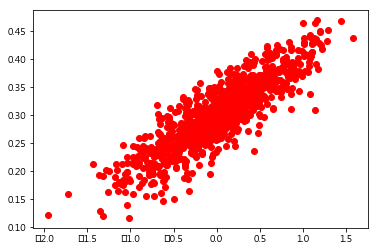

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

num_points = 1000
vectors_set = []

for i in range(num_points):
    x1 = np.random.normal(0.0, 0.55)
    y1 = x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    
    vectors_set.append([x1, y1])
    
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.plot(x_data, y_data, 'ro')
plt.show()

In [15]:
import tensorflow as tf

W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

for step in range(32):
    sess.run(train)    
    print(step, sess.run(W), sess.run(b), sess.run(loss))

0 [ 0.18860191] [ 0.30055898] 0.0030425
1 [ 0.16428104] [ 0.3003031] 0.00202254
2 [ 0.14666894] [ 0.3001326] 0.00148769
3 [ 0.13391513] [ 0.30000913] 0.00120721
4 [ 0.12467944] [ 0.29991972] 0.00106013
5 [ 0.11799141] [ 0.29985496] 0.000983001
6 [ 0.11314827] [ 0.29980808] 0.000942556
7 [ 0.10964111] [ 0.29977411] 0.000921347
8 [ 0.1071014] [ 0.29974952] 0.000910225
9 [ 0.10526226] [ 0.29973173] 0.000904392
10 [ 0.10393045] [ 0.29971883] 0.000901334
11 [ 0.10296602] [ 0.2997095] 0.00089973
12 [ 0.10226762] [ 0.29970273] 0.000898889
13 [ 0.10176188] [ 0.29969785] 0.000898448
14 [ 0.10139565] [ 0.2996943] 0.000898216
15 [ 0.10113044] [ 0.29969174] 0.000898095
16 [ 0.10093839] [ 0.29968986] 0.000898032
17 [ 0.10079932] [ 0.29968852] 0.000897998
18 [ 0.10069861] [ 0.29968753] 0.000897981
19 [ 0.10062569] [ 0.29968685] 0.000897972
20 [ 0.10057288] [ 0.29968634] 0.000897967
21 [ 0.10053463] [ 0.29968596] 0.000897964
22 [ 0.10050694] [ 0.29968569] 0.000897963
23 [ 0.10048688] [ 0.29968551] 0.

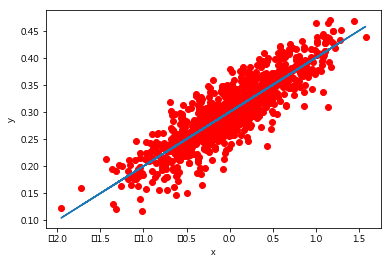

In [13]:
plt.plot(x_data, y_data, 'ro')
plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<tf.Tensor 'Shape:0' shape=(1,) dtype=int32>

In [18]:
tf.size(x_data)

<tf.Tensor 'Size:0' shape=() dtype=int32>

In [19]:
points

NameError: name 'points' is not defined

In [21]:
num_points = 2000
vectors_set = []

for i in range(num_points):
    if np.random.random() > 0.5:
        vectors_set.append([np.random.normal(0.0, 0.9), np.random.normal(0.0, 0.9)])
    else:
        vectors_set.append([np.random.normal(3.0, 0.5), np.random.normal(1.0, 0.5)])

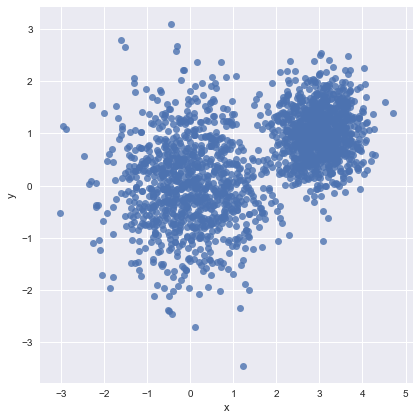

In [23]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({"x":[v[0] for v in vectors_set], 
                   "y":[v[1] for v in vectors_set]})
sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()

In [27]:
vectors = tf.constant(vectors_set)
k = 4
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,1]))

In [28]:
centroids

<tf.Variable 'Variable_15:0' shape=(4, 1) dtype=float32_ref>

In [31]:
tf.Tensor.get_shape(centroids)

TensorShape([Dimension(4), Dimension(1)])

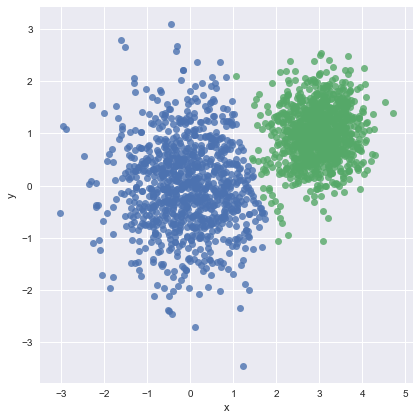

In [34]:
import tensorflow as tf

vectors = tf.constant(vectors_set)
k = 2
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0,0], [k,-1]))

expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centriods = tf.expand_dims(centroids, 1)

assignments = tf.argmin(tf.reduce_sum(tf.square(tf.subtract(
    expanded_vectors, expanded_centriods)), 2), 0)
means = tf.concat([tf.reduce_mean(tf.gather(vectors, 
    tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])),
    reduction_indices=[1]) for c in range(k)], 0)
                   
update_centroids = tf.assign(centroids, means)
init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
    _, centriod_values, assignment_values = sess.run([update_centroids, 
    centroids, assignments])
    
data = {"x":[], "y":[], "cluster":[]}

for i in range(len(assignment_values)):
    data["x"].append(vectors_set[i][0])
    data["y"].append(vectors_set[i][1])
    data["cluster"].append(assignment_values[i])
    
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, size=6, hue="cluster",
          legend=False)
plt.show()

In [42]:
centroids.get_shape()

TensorShape([Dimension(2), Dimension(2)])

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("mnist_data/", one_hot=True)

Extracting mnist_data/train-images-idx3-ubyte.gz
Extracting mnist_data/train-labels-idx1-ubyte.gz
Extracting mnist_data/t10k-images-idx3-ubyte.gz
Extracting mnist_data/t10k-labels-idx1-ubyte.gz


In [18]:
import tensorflow as tf
tf.convert_to_tensor(mnist.train.images).get_shape()

W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

x = tf.placeholder("float", [None, 784])
y = tf.nn.softmax(tf.matmul(x, W) + b)
y_ = tf.placeholder("float", [None, 10])

cross_entropy = -tf.reduce_sum(y_*tf.log(y))

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x:batch_xs, y_:batch_ys})

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
print(sess.run(accuracy, feed_dict={x:mnist.test.images, y_:mnist.test.labels}))

0.9155
